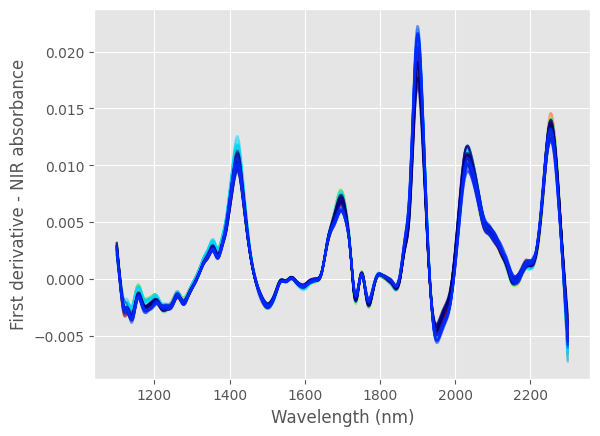

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

url = 'coffee_classification.csv'
data = pd.read_csv(url)

labels = data['Coffee Type']
y = LabelEncoder().fit_transform(labels)

X = -np.log(data.values[:,1:].astype('float32'))
Xc = X - X.mean(axis=0)
X1 = savgol_filter(X, 11, polyorder = 2, deriv=1)
wl = np.linspace(1100,2300, X.shape[1])

colors = [plt.cm.jet(float(i)/max(y)) for i in y]
with plt.style.context(('ggplot')):
    for i,j in enumerate(colors):
        plt.plot(wl, X1[i,:], c=j, alpha=0.5)
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('First derivative - NIR absorbance')
plt.show()